In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


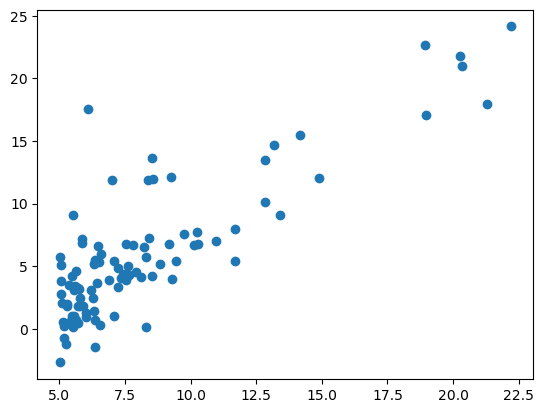

In [303]:
plt.scatter(X, y)
#plt.xlabel("Population of the City in 10,000")
#plt.ylabel("Profit in $10,000s")
plt.show()

In [304]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

C:\Users\klikh\AppData\Local\Temp\ipykernel_11060\351318876.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
C:\Users\klikh\AppData\Local\Temp\ipykernel_11060\351318876.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [305]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [306]:
#computing cost
def computeCost(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)


In [307]:
J=computeCost(X,y,theta)
print(J)

32.072733877455676


In [308]:
#compoute gradient descetn
def gradientDescentUnivariate(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=np.dot(X.transpose(),(y_pred-y))
        descent=alpha*1/m *error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history
theta,J_history=gradientDescentUnivariate(X,y,theta,alpha,iterations)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"X1")

h(x) = -3.63 + 1.17X1


In [309]:
#checking the cost values with new theta values
J=computeCost(X,y,theta)
print(J)

4.483388256587725


In [310]:
#we already have a vector of all the cost values throught the history
print(J_history[-1])

4.483388256587725


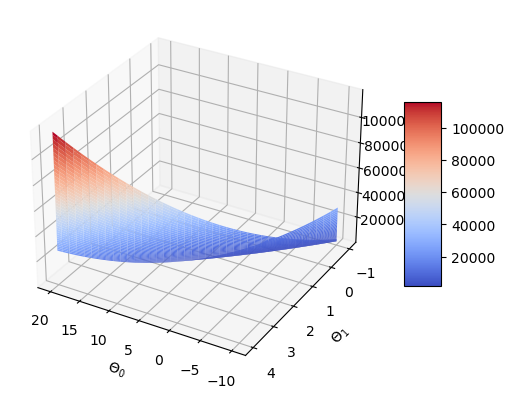

In [311]:
#3d diagram for genrating new theta values and corresponding cost values
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,20,120)
theta1_vals=np.linspace(-1,4,120)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

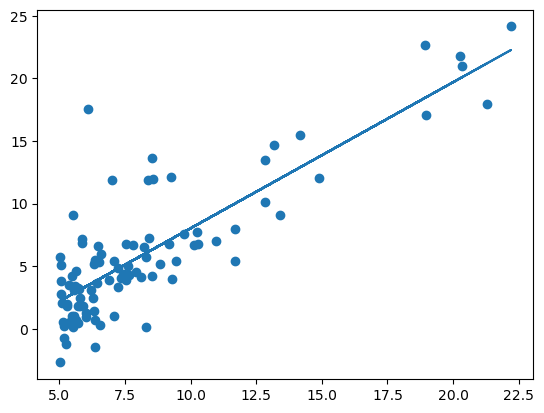

In [312]:
# plot to show the best fit line
plt.scatter(X[:,1],y)
plt.xlabel=("populaions of the city in 10000s")
plt.ylabel=("profit in $10000s")
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

# make prediction


In [313]:
#prediction funciton
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = {} we predict profit = ${}".format(3500,int(predict1)))

For population = 3500 we predict profit = $4519


# linear regression with multiple variable

Problem context:

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.

The file ex1data2.txt((available under week 2’s assignment material)) contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

You already have the necessary infrastructure which we built in our previous section that can be easily applied to this section as well. Here we will just use the equations which we made in the above section.


In [314]:
import numpy as np
import pandas as pd
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [315]:
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples

In [316]:
X.head()

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


# Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to:

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [317]:
#feature normalisation function
def featureNorm(X):
    return (X-np.mean(X))/np.std(X)

In [318]:
X=featureNorm(X)

C:\Users\klikh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# adding the intercept term


In [319]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
iterations = 450
theta = np.zeros((3,1))
y = y[:,np.newaxis]

C:\Users\klikh\AppData\Local\Temp\ipykernel_11060\3129908218.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [320]:
#computing cost
def computeCostMultiVariate(X,y,theta):
    y_pred=np.dot(X,theta)
    mse=(y_pred-y)**2
    return (1/(2*m)) * np.sum(mse)
J=computeCostMultiVaritate(X,y,theta)
print(" Cost = ",J)

 Cost =  65591548106.45744


# Optimal parameter by gradient descent algorithm

In [321]:
def gradientDescentMulti(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        error=(y_pred-y)
        descent=np.dot(X.transpose(),error)
        theta-=(1/m) *alpha *descent
        J_history.append(computeCostMultiVariate(X,y,theta))
        
    return theta,J_history

theta,J_history=gradientDescentMulti(X,y,theta,alpha,iterations)

In [322]:
print(theta)
print("\n")
print(J_history[-1])  #prints the last cost value
print("\n")
print("The optimum hypothesis is : h(x) =" + str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2)) + "X1"+str(round(theta[2,0],2))+"X2")

[[336715.71217402]
 [101430.56909074]
 [  1351.8616058 ]]


2078094104.5379953


The optimum hypothesis is : h(x) =336715.71 + 101430.57X11351.86X2


these are the optimum theta values


In [323]:
#lets see the cost over iterations
J=computeCostMultiVariate(X,y,theta)
print(J)

2078094104.5379953


Text(0.5, 1.0, 'Cost funtion optimization curve using graient descent')

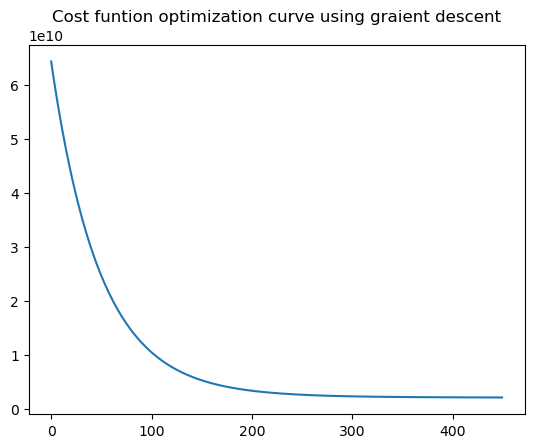

In [324]:
#plot the cost function vs iterations grap
plt.plot(J_history)
#plt.xlabel("iterations")
#plt.ylabel("$J(\Theta)$")
plt.title("Cost funtion optimization curve using graient descent")

In [348]:
#make predictions
def predict_house_price(feature,theta):
    y_pred=np.dot(theta.transpose(),feature)
    return y_pred
#feature normalisation of x values
x_sample = featureNorm(np.array([1650,3]))
x_sample=np.append(np.ones(1),x_sample)
predicted_price=predict_house_price(x_sample,theta)
print("Cost for new house having size {} and {} bedrooms: ".format(x_sample[0],x_sample[1]),predicted_price[0])
#print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

Cost for new house having size 1.0 and 1.0 bedrooms:  436794.4196589687
